#### Part a)

##### One-qubit basis

In [ ]:
import numpy as np


def create_qubit(theta: float, phi: float) -> np.ndarray:
  return np.array(
    [np.cos(theta / 2), np.exp(1j * phi) * np.sin(theta / 2)], dtype=np.complex128
  )


def apply_x_gate(qubit: np.ndarray) -> np.ndarray:
  x_gate = np.array([[0, 1], [1, 0]], dtype=np.complex128)
  return qubit @ x_gate


def apply_y_gate(qubit: np.ndarray) -> np.ndarray:
  x_gate = np.array([[0, -1j], [1j, 0]], dtype=np.complex128)
  return qubit @ x_gate


def apply_z_gate(qubit: np.ndarray) -> np.ndarray:
  y_gate = np.array([[1, 0], [0, -1]], dtype=np.complex128)
  return qubit @ y_gate


def hadamard_gate(qubit: np.ndarray) -> np.ndarray:
  h = np.array([[1, 1], [1, -1]], dtype=np.complex128) / np.sqrt(2)
  return qubit @ h


def apply_s_gate(qubit: np.ndarray) -> np.ndarray:
  s_gate = np.array([[1.0, 0.0], [0.0, 1.0j]], dtype=np.complex128)
  return qubit @ s_gate


# Example
qubit = create_qubit(theta=np.pi / 2, phi=0)  # |+> state: [0.70710678, 0.70710678]
qubit_h = apply_s_gate(qubit)  # Returns |i> state: [0.70710678, 0.70710678j]
print(qubit_h)

In [ ]:
import sys

import numpy as np
from qiskit.quantum_info import Statevector, Pauli, Operator
from qiskit.circuit.library import HGate, SGate

sys.path.insert(0, "../../src/python")
from qubit import Qubit

# Bloch vectors
theta = np.pi / 4
phi = np.pi / 4

qubit = Qubit(theta, phi)  # Own implementation
qubit_qk = Statevector(qubit.state)  # Qiskit representation

print(f"""Initial state:
Own implementation: |ψ⟩ = {qubit.dump_state(decimals=2)}, Bloch angles: {qubit.bloch_str(2)}
Qiskit implementation: |ψ⟩ = {qubit_qk.draw("text")}
""")

gates = {
  "Pauli X": ("x_gate", Pauli("X")),
  "Pauli Y": ("y_gate", Pauli("Y")),
  "Pauli Z": ("z_gate", Pauli("Z")),
  "Hadamard": ("hadamard_gate", Operator(HGate())),
  "S gate": ("s_gate", Operator(SGate())),
}

for name, (method, qiskit_gate) in gates.items():
  qubit_gate = Qubit(theta, phi)
  qubit_gate.__getattribute__(method)()
  qubit_qk_gate = qubit_qk.evolve(qiskit_gate)

  print(f"""State after {name} gate:
Own implementation: |ψ⟩ = {qubit_gate.dump_state(decimals=2)}, Bloch angles: {qubit_gate.bloch_str(2)}
Qiskit implementation: |ψ⟩ = {qubit_qk_gate.draw("text")}  
""")

Initial state:
Own implementation: |ψ⟩ = (0.92+0.00j)|0⟩ + (0.27+0.27j)|1⟩, Bloch angles: θ=45.00, φ=45.00
Qiskit implementation: |ψ⟩ = [0.92387953+0.j        ,0.27059805+0.27059805j]

State after Pauli X gate:
Own implementation: |ψ⟩ = (0.27+0.27j)|0⟩ + (0.92+0.00j)|1⟩, Bloch angles: θ=135.00, φ=315.00
Qiskit implementation: |ψ⟩ = [0.27059805+0.27059805j,0.92387953+0.j        ]  

State after Pauli Y gate:
Own implementation: |ψ⟩ = (0.27-0.27j)|0⟩ + (0.00+0.92j)|1⟩, Bloch angles: θ=135.00, φ=135.00
Qiskit implementation: |ψ⟩ = [0.27059805-0.27059805j,0.        +0.92387953j]  

State after Pauli Z gate:
Own implementation: |ψ⟩ = (0.92+0.00j)|0⟩ + (-0.27-0.27j)|1⟩, Bloch angles: θ=45.00, φ=225.00
Qiskit implementation: |ψ⟩ = [ 0.92387953+0.j        ,-0.27059805-0.27059805j]  

State after Hadamard gate:
Own implementation: |ψ⟩ = (0.84+0.19j)|0⟩ + (0.46-0.19j)|1⟩, Bloch angles: θ=60.00, φ=324.74
Qiskit implementation: |ψ⟩ = [0.8446232 +0.19134172j,0.46193977-0.19134172j]  

State after S

##### Bell states

Initial state:
Own code:    (0.71+0.00j)|01⟩ + (0.71+0.00j)|10⟩
Qiskit code: (0.71+0.00j)|01⟩ + (0.71+0.00j)|10⟩

State after Hadamard and CNOT gates:
Own code:    (0.50+0.00j)|00⟩ + (0.50+0.00j)|01⟩ + (0.50+0.00j)|10⟩ + (-0.50+0.00j)|11⟩
Qiskit code: (0.50+0.00j)|00⟩ + (0.50+0.00j)|01⟩ + (0.50+0.00j)|10⟩ + (-0.50+0.00j)|11⟩



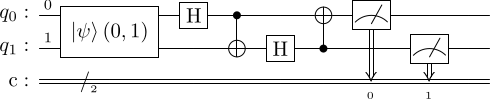

Measurement counts:
Own code:    {'00': 241, '01': 263, '10': 242, '11': 254}
Qiskit code: {'00': 251, '01': 250, '10': 253, '11': 246}



Text(0.5, 1.0, 'Measurement result after 1000 shot')

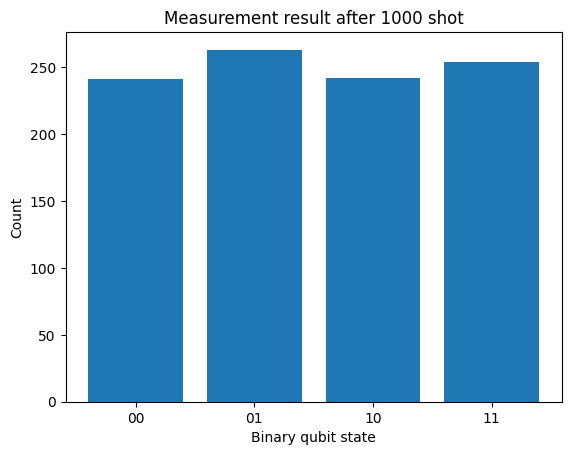

In [ ]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import qiskit_aer
from qiskit import transpile
from qiskit.quantum_info import Statevector, Operator, Pauli
from qiskit.circuit.library import HGate, CXGate

sys.path.insert(0, "../../src/python")
from qubit import BELL_STATES, create_bell_state, bell_state_circuit, dump_qubit_state

np.random.seed(42)

shots = 1000

# Initialize Bell state
selected_state = 1
bell_state = create_bell_state(selected_state)
initial_state = bell_state.dump_state(2)

# Apply Hadamard and CNOT gates
bell_state.hadamard(1)
bell_state.cnot(1, 0)
end_state = bell_state.dump_state(2)

# Measure qubit 0 and then qubit 1
counts = bell_state.measure([0, 1], shots)

# Compare state with qiskit implementation
qk_bell_state = Statevector(BELL_STATES[selected_state])
qk_initial_state = dump_qubit_state(qk_bell_state.data, 2)
H = Operator(HGate())
I = Operator(Pauli("I"))  # Identity for qubit 1

# Apply Hadamard to qubit 0 by tensoring: H ⊗ I
H_0 = I.tensor(H)
qk_bell_state = qk_bell_state.evolve(H_0)

# Apply CNOT with control in qubit 0
CNOT = Operator(CXGate())
SWAPPED_CNOT = I.tensor(CNOT)
qk_bell_state = qk_bell_state.evolve(CNOT)
qk_end_state = dump_qubit_state(qk_bell_state, 2)

# Print states
print(f"""Initial state:
Own code:    {initial_state}
Qiskit code: {qk_initial_state}
""")

print(f"""State after Hadamard and CNOT gates:
Own code:    {end_state}
Qiskit code: {qk_end_state}
""")

# Qiskit measurement
qc = bell_state_circuit(selected_state)
qc.h(1)  # Apply Hadamard to qubit 0
qc.cx(1, 0)  # Apply CNOT with control in qubit 0

qc.measure([0, 1], [0, 1])

simulator = qiskit_aer.Aer.get_backend("qasm_simulator")
qc_compiled = transpile(qc, simulator)
result = simulator.run(qc_compiled, shots=shots).result()
qk_counts = dict(sorted(result.get_counts(qc_compiled).items()))
print(f"""Measurement counts:
Own code:    {counts}
Qiskit code: {qk_counts}
""")

# Plot results
plt.bar(list(counts.keys()), list(counts.values()))
plt.xlabel("Binary qubit state")
plt.ylabel("Count")
plt.title(f"Measurement result after {shots} shot")
# plt.savefig("bell_state_measurement.pdf", format="pdf")

In [ ]:
from IPython.display import Latex
import sympy as sp


def print_latex(string: str) -> None:
  display(Latex(rf"$${string}$$"))


H = sp.Matrix([[1, 1], [1, -1]]) / sp.sqrt(2)
I = sp.Matrix([[1, 0], [0, 1]])

IH = sp.Matrix([[1, 1, 0, 0], [1, -1, 0, 0], [0, 0, 1, 1], [0, 0, 1, -1]]) / sp.sqrt(2)
CX = sp.Matrix([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])

A = CX * IH

print_latex(sp.latex(A))

<IPython.core.display.Latex object>